In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1XUwCbYsuUjrwuS9VyNy04cRpOATngQdy'

In [0]:
fluff, id = link.split('=')
print (id)

1XUwCbYsuUjrwuS9VyNy04cRpOATngQdy


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('training-testing.zip') 

In [0]:
import os
os.chdir('/content')

In [0]:
!ls

adc.json  sample_data  training-testing.zip


In [0]:
!unzip training-testing.zip

Archive:  training-testing.zip
   creating: training-testing/
   creating: training-testing/test/
   creating: training-testing/test/hyundai_i10/
  inflating: training-testing/test/hyundai_i10/66.jpg  
  inflating: training-testing/test/hyundai_i10/68.jpg  
  inflating: training-testing/test/hyundai_i10/72.jpg  
  inflating: training-testing/test/hyundai_i10/252.jpg  
  inflating: training-testing/test/hyundai_i10/253.jpg  
  inflating: training-testing/test/hyundai_i10/254.jpg  
  inflating: training-testing/test/hyundai_i10/255.png  
  inflating: training-testing/test/hyundai_i10/256.png  
  inflating: training-testing/test/hyundai_i10/257.jpg  
  inflating: training-testing/test/hyundai_i10/258.jpg  
  inflating: training-testing/test/hyundai_i10/259.jpg  
  inflating: training-testing/test/hyundai_i10/260.jpg  
  inflating: training-testing/test/hyundai_i10/261.jpg  
  inflating: training-testing/test/hyundai_i10/262.jpg  
  inflating: training-testing/test/hyundai_i10/001.jpg  
  

In [0]:
!ls

adc.json  sample_data  training-testing  training-testing.zip


In [0]:
os.chdir('training-testing')

In [0]:
!ls

test  train


In [0]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import keras

Using TensorFlow backend.


In [0]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

In [0]:
image_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=40,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True)
#val_datagen = ImageDataGenerator(rescale=1./255)

In [0]:
train_datagen = image_datagen.flow_from_directory('train/', target_size=(256,256),batch_size=32,class_mode='categorical')
val_datagen = image_datagen.flow_from_directory('test/',target_size=(256,256),batch_size=16,class_mode='categorical')

Found 640 images belonging to 2 classes.
Found 51 images belonging to 2 classes.


In [0]:
import keras
from keras.applications import vgg16
from keras.models import Model
vgg = vgg16.VGG16(include_top=False, weights='imagenet', 
                                     input_shape=(256,256,3))
output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)

vgg_model.trainable = False
for layer in vgg_model.layers:
    layer.trainable = False

# vgg_model.trainable = True

# set_trainable = False
# for layer in vgg_model.layers:
#     if layer.name in ['block5_conv1', 'block4_conv1']:
#         set_trainable = True
#     if set_trainable:
#         layer.trainable = True
#     else:
#         layer.trainable = False





58892288/58889256 [==============================] - 2s 0us/step








In [0]:



vgg_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0   

In [0]:
for layer in vgg_model.layers:
    print(layer.name)

input_1
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool
flatten_1


In [0]:


from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
model = Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu', input_dim=(256,256,3)))
model.add(Dropout(0.35))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.35))
model.add(Dense(2, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 32768)             14714688  
_________________________________________________________________
dense_1 (Dense)              (None, 512)               16777728  
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
results = model.fit_generator(train_datagen,epochs=100,
                              steps_per_epoch=18,
                              validation_data=val_datagen,
                             validation_steps=10)



Epoch 1/100
18/18 [==============================] - 19s 1s/step - loss: 0.8931 - acc: 0.5295 - val_loss: 0.6665 - val_acc: 0.5896
Epoch 2/100
18/18 [==============================] - 15s 855ms/step - loss: 0.7995 - acc: 0.5443 - val_loss: 0.7195 - val_acc: 0.5372
Epoch 3/100
18/18 [==============================] - 16s 865ms/step - loss: 0.8154 - acc: 0.5295 - val_loss: 0.6598 - val_acc: 0.6082
Epoch 4/100
18/18 [==============================] - 15s 814ms/step - loss: 0.7799 - acc: 0.5608 - val_loss: 0.6367 - val_acc: 0.6570
Epoch 5/100
18/18 [==============================] - 14s 781ms/step - loss: 0.7928 - acc: 0.5608 - val_loss: 0.6292 - val_acc: 0.6418
Epoch 6/100
18/18 [==============================] - 16s 877ms/step - loss: 0.7261 - acc: 0.5894 - val_loss: 0.6133 - val_acc: 0.7190
Epoch 7/100
18/18 [==============================] - 14s 796ms/step - loss: 0.7212 - acc: 0.5842 - val_loss: 0.6270 - val_acc: 0.6269
Epoch 8/100
18/18 [==============================] - 15s 858ms/

In [0]:
import numpy as np
x = np.arange(0,100)
y = results.history['loss']
y1 = results.history['acc']
y2 = results.history['val_acc']
y3 = results.history['val_loss']

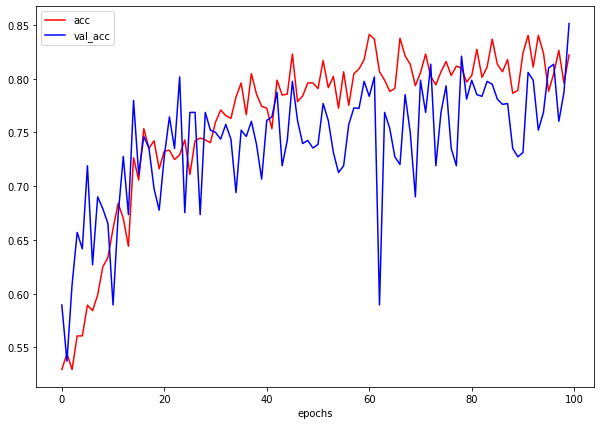

In [0]:
fig = plt.figure(figsize=(10,7))
plt.plot(x,y1,c='r',label='acc')
plt.plot(x,y2,c='b',label='val_acc')
plt.xlabel('epochs')
plt.legend()

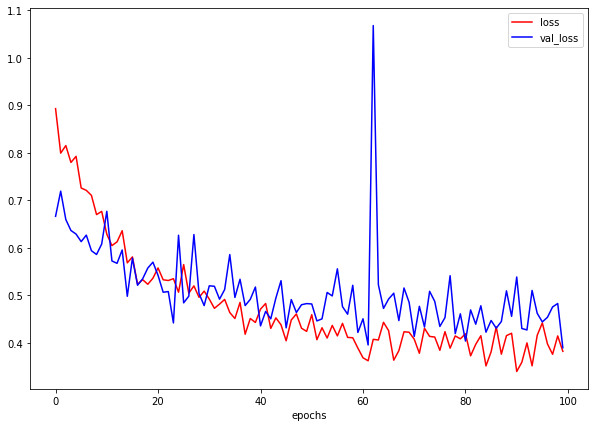

In [0]:
fig = plt.figure(figsize=(10,7))
plt.plot(x,y,c='r',label='loss')
plt.plot(x,y3,c='b',label='val_loss')
plt.xlabel('epochs')
plt.legend()

In [0]:
classes = []
for key in train_datagen.class_indices:
    classes.append(key)

In [0]:
train_datagen.class_indices

{'hyundai_i10': 0, 'hyundai_i20': 1}

In [0]:
from keras.preprocessing import image

In [0]:
#file = 'hyundai_cars/test/hyundai_i10_grand_exterior/72.jpg'
#file = 'hyundai_cars/test/hyundai_i10_grand_nios/89.jpg'
file = "/content/training-testing/index.jpeg"
#file = 'hyundai_cars/test/hyundai_i20_elite/97.jpg'

In [0]:
img = image.load_img(file, target_size=(256,256))

img = image.img_to_array(img)

img = np.expand_dims(img, axis=0)
img = img/255

pred = model.predict_classes(img)

classes[pred[0]]

'hyundai_i20'

In [0]:
model.save('vgg_fine_tuned-2.h5')

In [0]:
file = "images.jpeg" 

In [0]:
img = image.load_img(file, target_size=(256,256))

img = image.img_to_array(img)

img = np.expand_dims(img, axis=0)
img = img/255

pred = model.predict_classes(img)

classes[pred[0]]

'hyundai_i10'

In [0]:
!ls

test  train  vgg_fine_tuned.h5


In [0]:
file = "collison.jpg" 

In [0]:
img = image.load_img(file, target_size=(256,256))

img = image.img_to_array(img)

img = np.expand_dims(img, axis=0)
img = img/255

pred = model.predict_classes(img)

classes[pred[0]]

'hyundai_i10'

In [0]:
file = "/content/training-testing/test/hyundai_i20/241.jpg" 


In [0]:
img = image.load_img(file, target_size=(256,256))

img = image.img_to_array(img)

img = np.expand_dims(img, axis=0)
img = img/255

pred = model.predict_classes(img)

classes[pred[0]]

'hyundai_i20'

In [0]:
file = "/content/training-testing/hi20_active_2.jpeg"

In [0]:
img = image.load_img(file, target_size=(256,256))

img = image.img_to_array(img)

img = np.expand_dims(img, axis=0)
img = img/255

pred = model.predict_classes(img)

classes[pred[0]]

'hyundai_i20'